In [1]:
using HiddenMarkovModels
using DriftDiffusionModels
using Plots

In [2]:
# Create a true HMMDDM
true_trans = [0.9 0.1; 0.2 0.8]
true_init = [0.99, 0.01]

B_1 = 12
v1 = 1.25
a_0 = 0.0

B_2 = 2
v1 = 2.0
a_0 = -0.5

DDM1 = DriftDiffusionModel(B_1, v1, a_0, 1.0)
DDM2 = DriftDiffusionModel(B_2, v1, a_0, 1.0)

dists_true = [DDM1, DDM2]

hmm = HMM(true_init, true_trans, dists_true)

# sample from the true model
state_seq_true, obs_seq_true = rand(hmm, 10000)

(state_seq = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 1, 2, 1, 1, 2, 2, 2, 2], obs_seq = DDMResult[DDMResult(5.619444563583323, -1), DDMResult(5.620335676848126, -1), DDMResult(11.039302557219951, -1), DDMResult(5.853064712197196, -1), DDMResult(5.780344561419681, -1), DDMResult(6.220563246567271, -1), DDMResult(4.106987359087429, -1), DDMResult(4.215498589556822, -1), DDMResult(5.135570378759239, -1), DDMResult(6.316712196510669, -1)  …  DDMResult(1.3672201613359392, -1), DDMResult(0.9950761646480242, -1), DDMResult(4.898722332384891, 1), DDMResult(0.9368037177192973, -1), DDMResult(9.37783027005556, -1), DDMResult(3.522927045740074, -1), DDMResult(0.772493605501061, -1), DDMResult(0.4238351594587034, -1), DDMResult(0.5057242126018293, -1), DDMResult(0.9404264678935613, -1)])

In [11]:
# fit a naive hmm to the data
trans_guess = [0.95 0.05; 0.05 0.95]
init_guess = [0.5, 0.5]

B_1_guess = 10
v1_guess = 1.0
a_0_guess = 0.0

B_2_guess = 1
v2_guess = 1.0
a_0_guess = 0.0

DDM1_guess = DriftDiffusionModel(B_1_guess, v1_guess, a_0_guess, 1.0)
DDM2_guess = DriftDiffusionModel(B_2_guess, v2_guess, a_0_guess, 1.0)

dists_guess = [DDM1_guess, DDM2_guess]

hmm_guess = PriorHMM(init_guess, trans_guess, dists_guess, 2., 2.)

hmm_est, lls = baum_welch(hmm_guess, obs_seq_true; loglikelihood_increasing=false)

(PriorHMM{Float64, DriftDiffusionModel}([0.5999986329625502, 0.40000136703744976], [0.9004090102972845 0.09959098970271552; 0.19910234951312136 0.8008976504868787], DriftDiffusionModel[DriftDiffusionModel(11.833180941139808, 1.9755817890925118, -0.5131888022170478, 1.0), DriftDiffusionModel(1.9775433854583602, 1.9451316457587784, -0.49837678360685617, 1.0)], 2.0, 2.0), [-26637.039201691627, -16382.051093651053, -16001.973716459699, -15820.937771279143, -15799.416592998345, -15798.82589102646, -15798.815914300085, -15798.815842295866, -15798.81585388818])

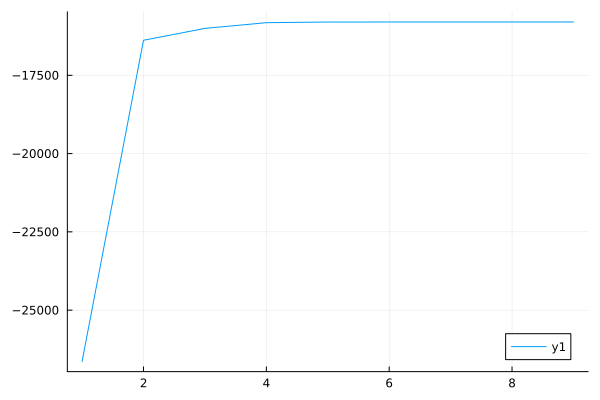

In [12]:
plot(lls)

In [4]:
posterior = forward(hmm_est, obs_seq_true)

UndefVarError: UndefVarError: `hmm_est` not defined

In [5]:
plot(posterior[1]'[1:500, 2])
plot!(state_seq_true[1:500] .- 1)

UndefVarError: UndefVarError: `posterior` not defined